In [1]:
import functools
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

from tensorflow_probability import bijectors as tfb
from tensorflow_probability import distributions as tfd

import pandas as pd

tf.enable_v2_behavior()

plt.style.use("ggplot")
warnings.filterwarnings('ignore')

Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


In [2]:
q = 10

In [3]:
FileName = '/Users/sventur/WORKSPACE/ROMNet/Data/0DReact_Isobaric_500Cases_H2/Orig/train/ext/y.csv.1'
Data     = pd.read_csv(FileName)
Vars     = ['T','H2','H','O','O2','OH','H2O','HO2','H2O2','N','NH','NH2','NH3','NNH','NO','NO2','N2O','HNO','N2']# list(Data.columns)[1::]
X        = Data[Vars].to_numpy()
d        = X.shape[1]

In [4]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns     = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray         = np.zeros(rows)
    C                 = np.zeros(columns)
    D                 = np.zeros(columns)
    
    for column in range(columns):
        
        C[column] = np.mean(X[:,column])
        D[column] = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - C[column]) / D[column]))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray, C, D

In [5]:
X_mean = np.mean(X,axis=0)
X_std  = np.std(X,axis=0)
XX     = (X-X_mean)#/X_std
#print("Data mean:")
#print(X_mean)

#X_cov = XX.T @ XX
#X_cov = X.T @ X
#print("Data cov:")
#print(X_cov)

XOrig   = X.copy()

[61.36586487247073, 22.129226498460138, 10.379205105995869, 4.5531025491925226, 1.1598666937546283, 0.2860129528401222, 0.10477808578205357, 0.015195491996399826, 0.0050670211500018734, 0.001503697003526205, 0.00015196209874555696, 2.377640723269891e-05, 1.238351806071362e-06, 4.480778768235705e-08, 7.986099088049477e-09, 1.7023482982759117e-09, -2.060043224490868e-15, 4.675176771487385e-15, 6.000617232498629e-16]
[ 61.36586487  83.49509137  93.87429648  98.42739903  99.58726572
  99.87327867  99.97805676  99.99325225  99.99831927  99.99982297
  99.99997493  99.99999871  99.99999995  99.99999999 100.
 100.         100.         100.         100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

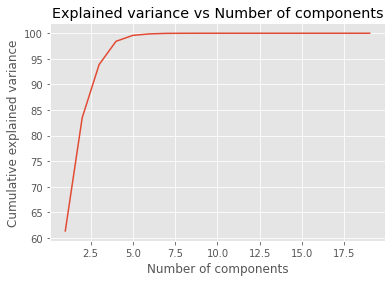

In [6]:
X, C, D = standardize_data(X)
X_cov   = np.cov(X.T)

eigen_values, eigen_vectors = np.linalg.eig(X_cov)
#print("Eigenvector: \n",eigen_vectors,"\n")
#print("Eigenvalues: \n", eigen_values, "\n")

variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

sns.lineplot(x = np.arange(19)+1, y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

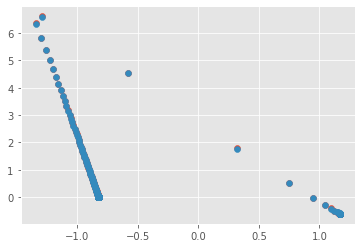

In [7]:
projection_matrix = (eigen_vectors.T[:q]).T

X_pca = X.dot(projection_matrix)

X_    = X_pca.dot(projection_matrix.T)

plt.scatter(X[:,1], X[:,2])
plt.scatter(X_[:,1], X_[:,2])

In [95]:
https://medium.com/practical-coding/the-simplest-generative-model-you-probably-missed-c840d68b704

SyntaxError: invalid syntax (3837896329.py, line 1)

In [73]:
X_cov              = np.cov(XOrig,rowvar=False)


# Variance
lambdas, eigenvecs = np.linalg.eig(X_cov)
idx                = lambdas.argsort()[::-1]   
lambdas            = lambdas[idx]
eigenvecs          = eigenvecs[:,idx]
#print(eigenvecs)
# print(eigenvecs @ np.diag(lambdas) @ np.transpose(eigenvecs))

var_ml = (1.0 / (d-q)) * sum([lambdas[j] for j in range(q,d)])
#print("Var ML:")
#print(var_ml)

# Weight matrix
uq = (eigen_vectors.T[:q]).T
#print("uq:")
#print(uq)

lambdaq = np.diag(lambdas[:q])
#print("lambdaq")
#print(lambdaq)

weight_ml = uq @ np.sqrt(lambdaq - var_ml * np.eye(q))
#print("Weight matrix ML:")
#print(weight_ml)

In [80]:
XOrig

array([[1.12700000e+03, 7.09750455e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.22665253e-01],
       [1.12700000e+03, 7.09750455e-02, 5.55859629e-12, ...,
        1.71104673e-19, 3.85912922e-31, 7.22665253e-01],
       [1.12700000e+03, 7.09750455e-02, 5.73980717e-12, ...,
        1.77821238e-19, 4.53905036e-31, 7.22665253e-01],
       ...,
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01],
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01],
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01]])

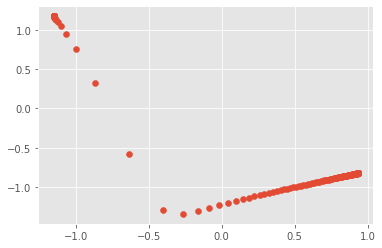

In [94]:
X_pca = X @ weight_ml
X_    = X_pca @ weight_ml.T# * D + C

plt.scatter(X[:,0], X[:,1])
#plt.scatter(X_[:,0], X_[:,1])

In [91]:
X - X_

array([[ 371694.96889456, -360306.97783473,  128984.28381605, ...,
         394093.84472389,  380517.95413123, -383261.41985984],
       [ 371695.03183329, -360307.03884516,  128984.30565687, ...,
         394093.91145539,  380518.01856388, -383261.48475705],
       [ 371695.03390748, -360307.04085581,  128984.30637665, ...,
         394093.91365457,  380518.02068731, -383261.48689578],
       ...,
       [-529808.57409577,  513576.45825915, -183852.9552191 , ...,
        -561735.28064866, -542383.39765392,  546293.90910825],
       [-529808.57409578,  513576.45825916, -183852.9552191 , ...,
        -561735.28064867, -542383.39765393,  546293.90910826],
       [-529808.57409579,  513576.45825917, -183852.95521911, ...,
        -561735.28064869, -542383.39765394,  546293.90910827]])

In [58]:
def sample_hidden_given_visible(
    weight_ml       : np.array, 
    mu_ml           : np.array,
    var_ml          : float,
    visible_samples : np.array
    ) -> np.array:

    q = weight_ml.shape[1]
    m = np.transpose(weight_ml) @ weight_ml + var_ml * np.eye(q)

    cov = var_ml * np.linalg.inv(m)
    act_hidden = []
    for data_visible in visible_samples:
        mean = np.linalg.inv(m) @ np.transpose(weight_ml) @ (data_visible - mu_ml)
        sample = np.random.multivariate_normal(mean,cov,size=1)
        act_hidden.append(sample[0])
    
    return np.array(act_hidden)

In [59]:
act_hidden = sample_hidden_given_visible(
    weight_ml       = weight_ml,
    mu_ml           = X_mean,
    var_ml          = var_ml,
    visible_samples = X
    )

In [60]:
mean_hidden    = np.full(q,0)
cov_hidden     = np.eye(q)

no_samples     = len(X)
samples_hidden = np.random.multivariate_normal(mean_hidden,cov_hidden,size=no_samples)

In [61]:
def sample_visible_given_hidden(
    weight_ml : np.array, 
    mu_ml : np.array,
    var_ml : float,
    hidden_samples : np.array
    ) -> np.array:

    d = weight_ml.shape[0]

    act_visible = []
    for data_hidden in hidden_samples:
        mean = weight_ml @ data_hidden + mu_ml
        cov = var_ml * np.eye(d)
        sample = np.random.multivariate_normal(mean,cov,size=1)
        act_visible.append(sample[0])
    
    return np.array(act_visible)

In [62]:
act_visible = sample_visible_given_hidden(
    weight_ml      = weight_ml,
    mu_ml          = X_mean,
    var_ml         = var_ml,
    hidden_samples = samples_hidden
    )

act_visible = (act_visible - C) / D

# print("Covariance visibles (data):")
# print(X_cov)
# print("Covariance visibles (sampled):")
# print(np.cov(act_visible,rowvar=False))

print("Mean visibles (data):")
print(np.mean(X,axis=0))
print("Mean visibles (sampled):")
print(np.mean(act_visible,axis=0))

Mean visibles (data):
[ 2.12718732e-16 -4.71622741e-16 -2.73045475e-17  1.07691633e-17
  4.00568467e-16 -7.26085858e-17  8.05133737e-16  6.35047570e-17
 -3.33066907e-17 -1.24344979e-16 -8.65973959e-17 -9.76108083e-16
  2.32258657e-16 -7.19146964e-17  1.66533454e-16  1.43884904e-16
 -3.37507799e-16 -7.36743999e-16 -6.01764860e-13]
Mean visibles (sampled):
[ 2.86628517e-05 -1.26088966e+00  2.96155906e+00  1.12473898e+01
 -1.67001528e-01 -2.76421038e+01  1.56434790e-01 -2.38008159e+03
 -6.90122436e+04  2.10266684e+06 -1.76327385e+05 -6.14381407e+03
  1.54773414e+04 -1.98694738e+06  5.08733964e+01 -5.86923174e+06
  4.53281671e+06 -5.41491633e+05 -1.12865512e+02]


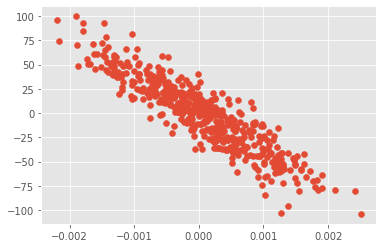

In [63]:
#plt.scatter(XOrig[:,0], XOrig[:,1])
plt.scatter(act_visible[:,0], act_visible[:,1])

In [64]:
XOrig

array([[1.12700000e+03, 7.09750455e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.22665253e-01],
       [1.12700000e+03, 7.09750455e-02, 5.55859629e-12, ...,
        1.71104673e-19, 3.85912922e-31, 7.22665253e-01],
       [1.12700000e+03, 7.09750455e-02, 5.73980717e-12, ...,
        1.77821238e-19, 4.53905036e-31, 7.22665253e-01],
       ...,
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01],
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01],
       [2.44158146e+03, 4.43513904e-02, 7.16717085e-04, ...,
        9.45215899e-09, 3.14544997e-08, 7.22589740e-01]])